In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2> I) Data Loading </h2>

In [2]:
# Load dataset
titanic_df = pd.read_csv("clean_titanic.csv")
titanic_df

,Survived,Class,Sex,Age,Fare,SiblingsSpouses,ParentsChildren,embarked
0,0,3,M,22.0,7.2500,1,0,S
1,1,1,F,38.0,71.2833,1,0,C
2,1,3,F,26.0,7.9250,0,0,S
3,1,1,F,35.0,53.1000,1,0,S
4,0,3,M,35.0,8.0500,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,M,27.0,13.0000,0,0,S
887,1,1,F,19.0,30.0000,0,0,S
888,0,3,F,28.0,23.4500,1,2,S
889,1,1,M,26.0,30.0000,0,0,C


In [3]:
titanic_df.columns

Index(['Survived', 'Class', 'Sex', 'Age', 'Fare', 'SiblingsSpouses',
       'ParentsChildren', 'embarked'],
      dtype='object')

<h2>II) Accident Overview </h2>

<h3>a) Survival Rate 

In [101]:
survived_count = float(titanic_df['Survived'].sum())       #Count the number of survivals
survival_rate = survived_count / len(titanic_df['Survived'])  #Death ratio: number of survivals / total number of passengers


print(f"Number of survivals: {survived_count:.2f}")
print(f"Chance of survive: {survival_rate:.2f}")

Number of survivals: 342.00
Chance of survive: 0.38


<h3>b) Ticket class distribution

In [5]:
class_ticket = titanic_df[["Class"]]

class_ticket_1 = len(class_ticket[class_ticket["Class"] == 1])
class_ticket_2 = len(class_ticket[class_ticket["Class"] == 2])
class_ticket_3 = len(class_ticket[class_ticket["Class"] == 3])

class_ticket_counts = pd.DataFrame(                  #Create a dataset with the number of ticket class 1, class 2 and class 3
    {'Class 1': [class_ticket_1],
     'Class 2': [class_ticket_2],
     'Class 3': [class_ticket_3],
     })



class_ticket_counts


,Class 1,Class 2,Class 3
0,216,184,491


<h3>c) Gender and family distribution

In [6]:
#Number of women number of men

gender_df = titanic_df[['Sex']]
gender_counts = gender_df.value_counts()



#Number of children

children_df = titanic_df[['ParentsChildren']].sum()


In [7]:
print("Gender Distribution")
gender_counts

Gender Distribution


Sex
M      577
F      314
Name: count, dtype: int64

In [102]:
print("Number of Parents and Children")
children_df

Number of Parents and Children


ParentsChildren    340
dtype: int64

<h3>d) Age distribution 

In [9]:
age_df = titanic_df[["Age"]]
age_info = age_df.describe()  #Compute mean, std, quartiles and other standar statistic metrics
age_info  


,Age
count,891.000000
mean,29.294284
std,13.182392
min,0.000000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


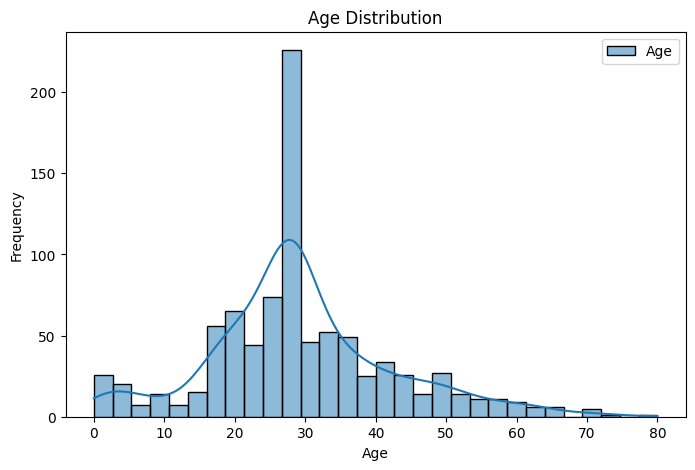

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(age_df, bins=30, kde=True) 
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<h3>e) Ticket Price in £

In [11]:
ticket_price_df = titanic_df[['Fare']]
ticket_price_df.describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


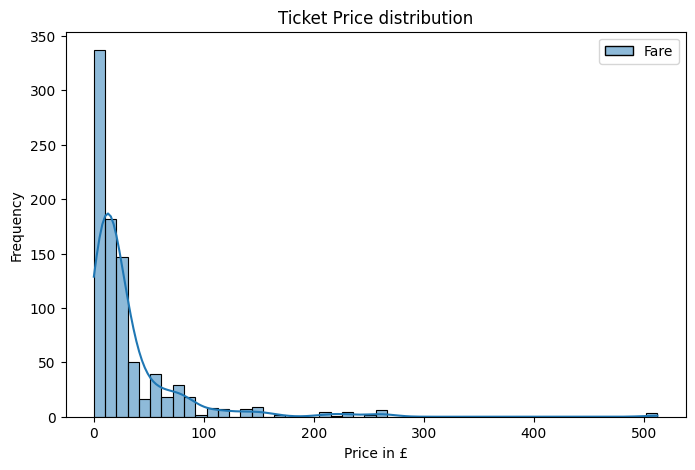

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(ticket_price_df, bins=50, kde=True) 
plt.title("Ticket Price distribution")
plt.xlabel("Price in £")
plt.ylabel("Frequency")
plt.show()

We want to take into account inflation to estimate what would be the price of Titanic tickets today

In [13]:
#Inflation adjustement, retail price index (rpi) have been estimated with Chatgpt

rpi_2025 = 330 
rpi_2012 = 10.1

list_adjusted_price = []

for i in range(0, len(ticket_price_df)):
    old_price = ticket_price_df.loc[i, 'Fare']
    new_price = old_price * (rpi_2025 / rpi_2012)
    list_adjusted_price.append(new_price)
    
ticket_price_df['Adjusted Price'] = list_adjusted_price
ticket_price_df

C:\Users\turki\AppData\Local\Temp\ipykernel_30860\3488271965.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticket_price_df['Adjusted Price'] = list_adjusted_price


,Fare,Adjusted Price
0,7.2500,236.881188
1,71.2833,2329.058317
2,7.9250,258.935644
3,53.1000,1734.950495
4,8.0500,263.019802
...,...,...
886,13.0000,424.752475
887,30.0000,980.198020
888,23.4500,766.188119
889,30.0000,980.198020


In [14]:
ticket_price_df[['Adjusted Price']].describe()

,Adjusted Price
count,891.000000
mean,1052.216696
std,1623.646677
min,0.000000
25%,258.458614
50%,472.265941
75%,1012.871287
max,16739.468911


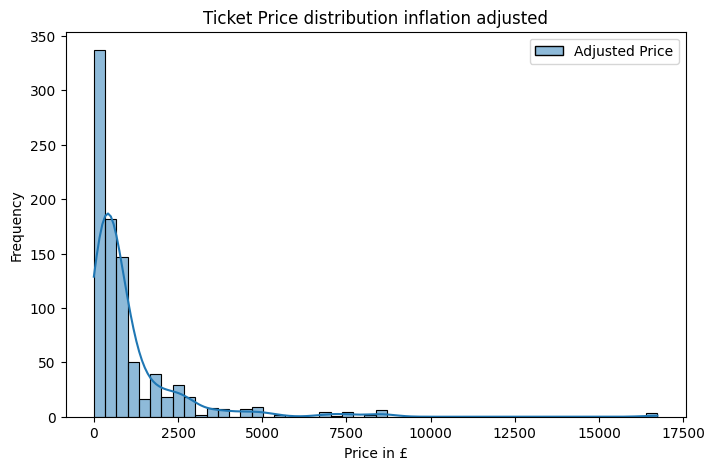

In [103]:
plt.figure(figsize=(8,5))
sns.histplot(ticket_price_df[['Adjusted Price']], bins=50, kde=True) 
plt.title("Ticket Price distribution inflation adjusted")
plt.xlabel("Price in £")
plt.ylabel("Frequency")
plt.show()

<h2>III) Correlation metrics </h2>

<h3>a) Correlation Matrix

In [16]:
titanic_df_num = titanic_df
titanic_df_num

,Survived,Class,Sex,Age,Fare,SiblingsSpouses,ParentsChildren,embarked
0,0,3,M,22.0,7.2500,1,0,S
1,1,1,F,38.0,71.2833,1,0,C
2,1,3,F,26.0,7.9250,0,0,S
3,1,1,F,35.0,53.1000,1,0,S
4,0,3,M,35.0,8.0500,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,M,27.0,13.0000,0,0,S
887,1,1,F,19.0,30.0000,0,0,S
888,0,3,F,28.0,23.4500,1,2,S
889,1,1,M,26.0,30.0000,0,0,C


C:\Users\turki\AppData\Local\Temp\ipykernel_30860\3727660918.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df_num['Sex'] = titanic_df_num['Sex'].replace({'M' : 0, 'F' : 1})
C:\Users\turki\AppData\Local\Temp\ipykernel_30860\3727660918.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df_num['embarked'] = titanic_df_num['embarked'].replace({'S' : 0, 'Q' : 1, 'Q' : 2, 'C' : 3})


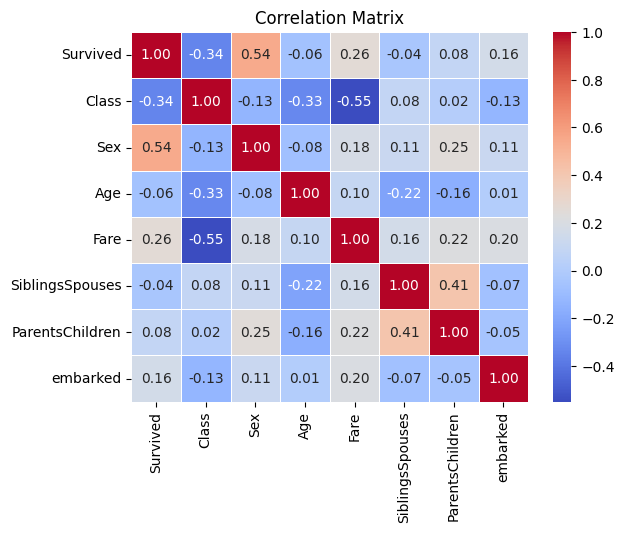

In [17]:
#Correlation matrix

titanic_df_num['Sex'] = titanic_df_num['Sex'].replace({'M' : 0, 'F' : 1})
titanic_df_num['embarked'] = titanic_df_num['embarked'].replace({'S' : 0, 'Q' : 1, 'Q' : 2, 'C' : 3})
corr_matrix = titanic_df_num.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<h3>b) Pairwise Plots

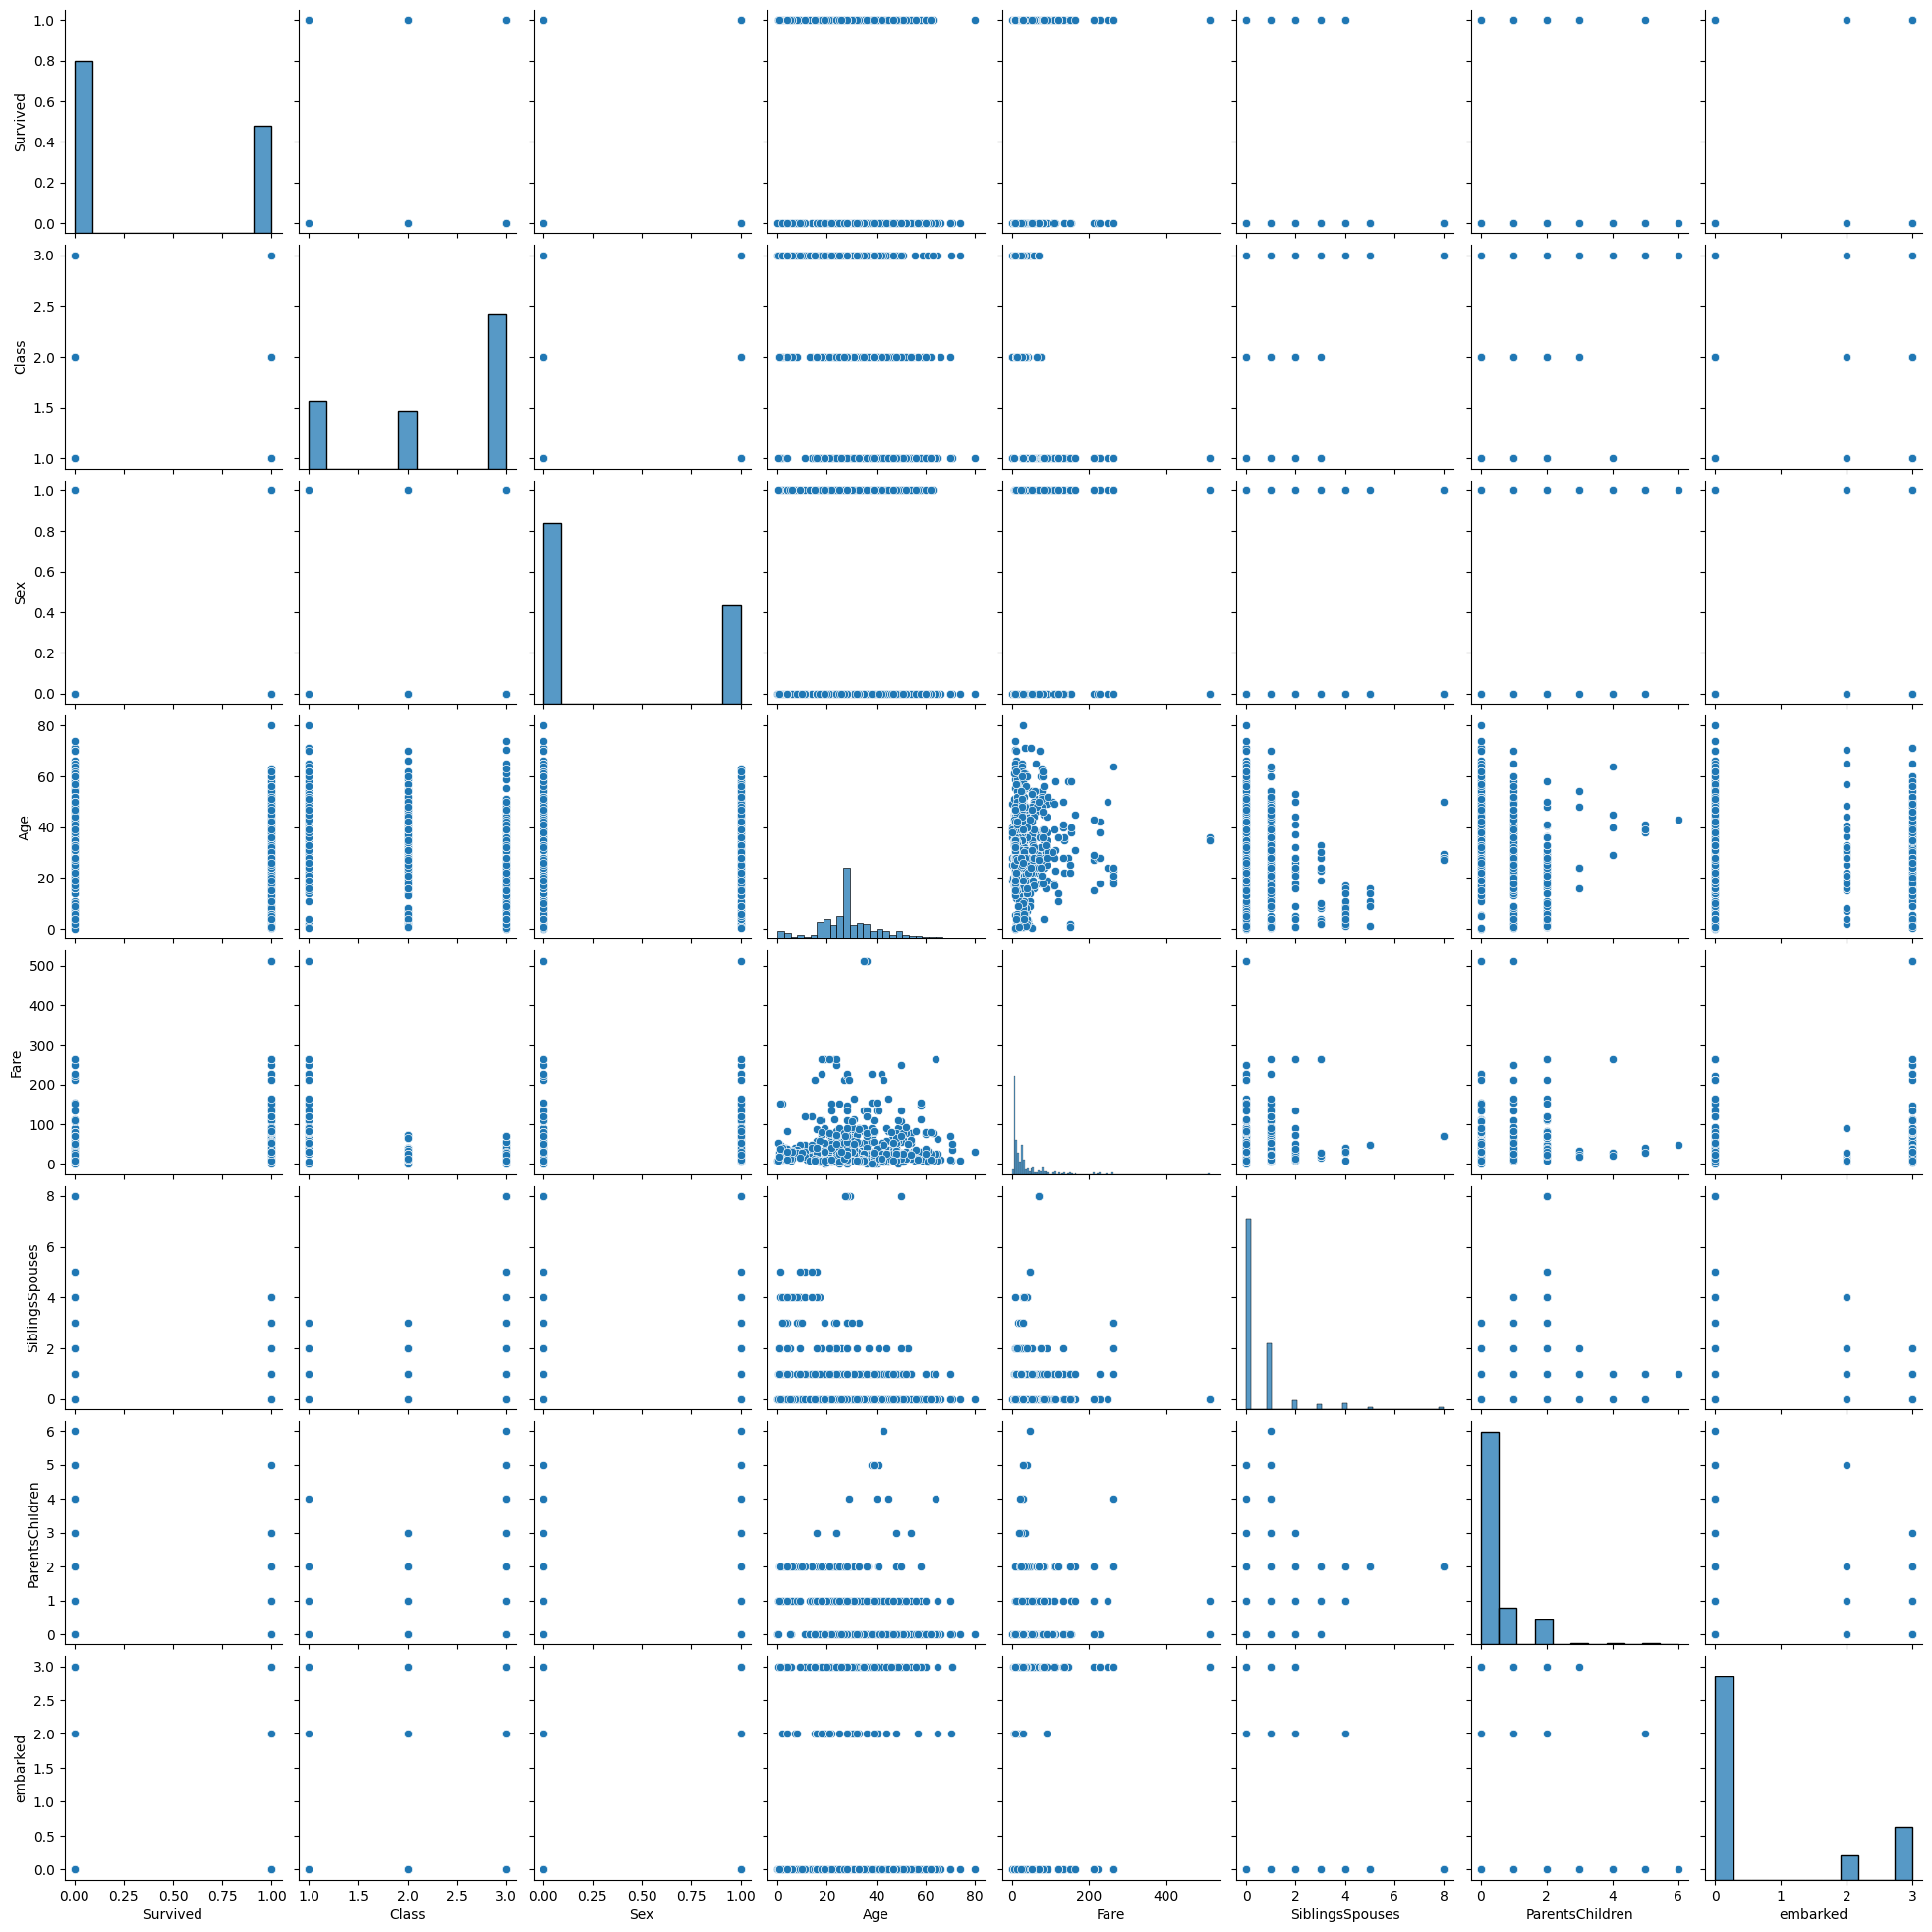

In [18]:
sns.pairplot(titanic_df_num)

<h3>c) PCA

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit(titanic_df_num).transform(titanic_df)


In [66]:
titanic_df_num.columns

Index(['Survived', 'Class', 'Sex', 'Age', 'Fare', 'SiblingsSpouses',
       'ParentsChildren', 'embarked'],
      dtype='object')

In [67]:
r = pca.components_

print(r)

[[ 2.51271152e-03 -9.27686401e-03  1.74699411e-03  2.77349491e-02
   9.99542673e-01  3.50445303e-03  3.48459170e-03  5.03656543e-03]
 [-3.34909754e-03 -1.75980572e-02 -3.48401850e-03  9.99182067e-01
  -2.77597327e-02 -1.99320153e-02 -1.15620556e-02 -7.62307129e-04]
 [ 6.54976093e-02 -7.45066496e-02  1.08151706e-02 -1.24158766e-02
  -2.37184687e-03 -4.63942708e-01 -2.32275294e-01  8.48933111e-01]]


In [68]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.33461364e-01, 6.50195266e-02, 5.83623157e-04])

PCA 1 is corresponding to Flare and holds 93% of the variance

PCA 2 is corresponding to Age and holds 6.5% of the variance

PCA 3 is corresponding to embarked and holds 0.0005% of the variance

<h2>IV) Features linked to Survival </h2>

<h3>a) Mutual information

In [78]:
target_feature = titanic_df_num[['Survived']]  
X = titanic_df_num.drop(columns={'Survived'})
X

,Class,Sex,Age,Fare,SiblingsSpouses,ParentsChildren,embarked
0,3,0,22.0,7.2500,1,0,0
1,1,1,38.0,71.2833,1,0,3
2,3,1,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,1,0,0
4,3,0,35.0,8.0500,0,0,0
...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0,0
887,1,1,19.0,30.0000,0,0,0
888,3,1,28.0,23.4500,1,2,0
889,1,0,26.0,30.0000,0,0,3


In [79]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, target_feature)
mi

c:\Users\turki\miniconda3\envs\dse_511_titanic\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.06423172, 0.1658248 , 0.01946528, 0.13518397, 0.02591097,
       0.03672158, 0.        ])

<h3>b) Tree based importance feature

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X, target_feature)
importances = rf.feature_importances_

importances

c:\Users\turki\miniconda3\envs\dse_511_titanic\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0.08292245, 0.25883338, 0.26178664, 0.2754741 , 0.04970601,
       0.03982367, 0.03145375])

<h3>c) Plot

In [99]:
feature_name = X.columns.to_list()

feature_importances = pd.DataFrame({
    'Features' : feature_name, 
    'Mutual Information' : mi, 
    'RF Importance' : importances
})

feature_importances = feature_importances.set_index('Features')
feature_importances

,Mutual Information,RF Importance
Features,,
Class,0.064232,0.082922
Sex,0.165825,0.258833
Age,0.019465,0.261787
Fare,0.135184,0.275474
SiblingsSpouses,0.025911,0.049706
ParentsChildren,0.036722,0.039824
embarked,0.000000,0.031454


<Axes: xlabel='Features'>

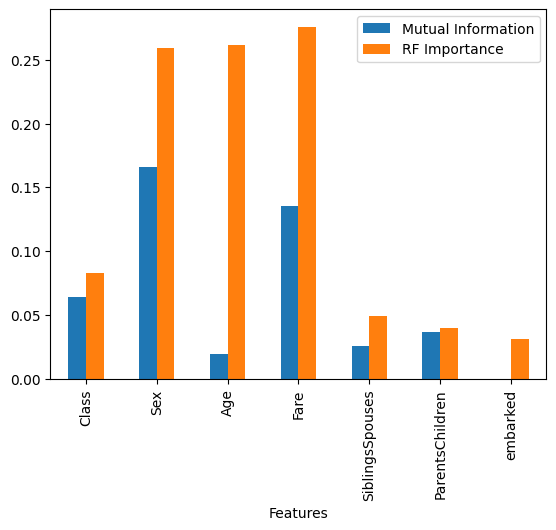

In [100]:
feature_importances.plot(kind='bar')